<h1> Objective:- Assessment Task 3.2C: Descriptor matching </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 2210470832 </b></div>

### 1. Matching images using local descriptors

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#load images
img = cv.imread('empire.jpg')
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_another = cv.imread('fisherman.jpg')

#convert the images to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [2]:
#initialise SIFT
sift = cv.SIFT_create()

#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [3]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

True

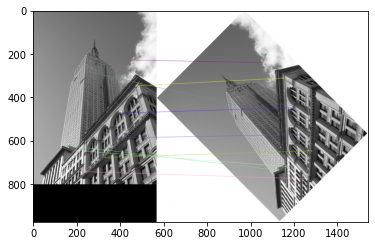

In [4]:
# Draw the best 10 matches.
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45, 
                                     matches_des_des_45[:nBestMatches],
                                     None,
                                     flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_des_45)
cv.imwrite('matching_des_des_45.png', matching_des_des_45)

In [5]:
kp_train = kp_45
kp_query = kp
for i in range (0, nBestMatches):
    print("match ", i, " info")
    print("\tdistance:", matches_des_des_45[i].distance)
    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:",
        kp_train[matches_des_des_45[i].trainIdx].pt[0], " y:",
        kp_train[matches_des_des_45[i].trainIdx].pt[1])
    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:",
        kp_query[matches_des_des_45[i].queryIdx].pt[0], " y:",
        kp_query[matches_des_des_45[i].queryIdx].pt[1])

match  0  info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6953125  y: 773.8291015625
	keypoint in query: ID: 661  x: 215.93626403808594  y: 740.7075805664062
match  1  info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375  y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.7016296386719  y: 587.2409057617188
match  2  info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.35565185546875  y: 240.71559143066406
	keypoint in query: ID: 2328  x: 458.29034423828125  y: 229.1185760498047
match  3  info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6529541015625  y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875  y: 472.7430725097656
match  4  info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.5103759765625  y: 733.697998046875
	keypoint in query: ID: 101  x: 153.57803344726562  y: 621.663818359375
match  5  info
	distance: 13.0
	keypoint in train: ID: 1753

True

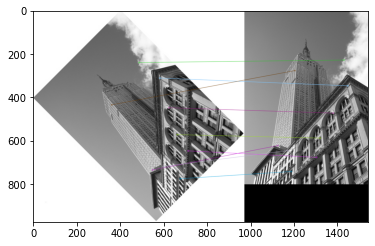

In [6]:
matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp,
                                     matches_des_45_des[:nBestMatches],
                                     None,
                                     flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_45_des)
cv.imwrite('matching_des_45_des.png', matching_des_45_des)

### 2. Comparing images using descriptor matching

##### nBestMatches = 10 

#### i) Empire vs Empire_45

In [7]:
# Initialise a brute force matcher with default params
nBestMatches = 10
bf = cv.BFMatcher()

#Calculating matches_des_des_45 
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance) #Sorting based on distance

In [8]:
matches_des_des_45_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_45_distance = matches_des_des_45_distance + matches_des_des_45[i].distance
print(matches_des_des_45_distance)

126.06704616546631


In [9]:
#Calculating matches_des45_des 
train = des
query = des_45
matches_des45_des = bf.match(query, train)

matches_des45_des = sorted(matches_des45_des, key = lambda x:x.distance) #Sorting based on distance

In [10]:
matches_des45_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des45_des_distance = matches_des45_des_distance + matches_des45_des[i].distance
print(matches_des45_des_distance)

126.06704616546631


In [11]:
similarity_empire_empire45 = 0.5 * (matches_des_des_45_distance + matches_des45_des_distance)
print('Similarity value between empire vs empire_45:', similarity_empire_empire45)

Similarity value between empire vs empire_45: 126.06704616546631


#### ii) Empire vs Empire_Zoomedout

In [12]:
#Calculating matches_des_des_zoomedout 
train = des_zoomedout
query = des
matches_des_des_zoomedout = bf.match(query, train)

matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance) #Sorting based on distance

In [13]:
matches_des_des_zoomedout_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_zoomedout_distance = matches_des_des_zoomedout_distance + matches_des_des_zoomedout[i].distance
print(matches_des_des_zoomedout_distance)

114.81388759613037


In [14]:
#Calculating matches_des_zoomedout_des 
train = des
query = des_zoomedout
matches_des_zoomedout_des = bf.match(query, train)

matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance) #Sorting based on distance

In [15]:
matches_des_zoomedout_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_zoomedout_des_distance = matches_des_zoomedout_des_distance + matches_des_zoomedout_des[i].distance
print(matches_des_zoomedout_des_distance)

114.81388759613037


In [16]:
similarity_empire_empire45 = 0.5 * (matches_des_des_zoomedout_distance + matches_des_zoomedout_des_distance)
print('Similarity value between empire vs empire_zoomedout:', similarity_empire_empire45)

Similarity value between empire vs empire_zoomedout: 114.81388759613037


#### iii) Empire vs Fisherman

In [17]:
#Calculating matches_des_des_another
train = des_another
query = des
matches_des_des_another = bf.match(query, train)

matches_des_des_another = sorted(matches_des_des_another, key = lambda x:x.distance) #Sorting based on distance

In [18]:
matches_des_des_another_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_another_distance = matches_des_des_another_distance + matches_des_des_another[i].distance
print(matches_des_des_another_distance)

931.2929534912109


In [19]:
#Calculating matches_des_another_des
train = des
query = des_another
matches_des_another_des = bf.match(query, train)

matches_des_another_des = sorted(matches_des_another_des, key = lambda x:x.distance) #Sorting based on distance

In [20]:
matches_des_another_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_another_des_distance = matches_des_another_des_distance + matches_des_another_des[i].distance
print(matches_des_another_des_distance)

791.0559463500977


In [21]:
similarity_empire_fisherman = 0.5 * (matches_des_des_another_distance + matches_des_another_des_distance)
print('Similarity value between empire vs fisherman:', similarity_empire_fisherman)

Similarity value between empire vs fisherman: 861.1744499206543


##### nBestMatches = 20

#### i) Empire vs Empire_45

In [22]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
nBestMatches = 20

#Calculating matches_des_des_45
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance) #Sorting based on distance

In [23]:
matches_des_des_45_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_45_distance = matches_des_des_45_distance + matches_des_des_45[i].distance
print(matches_des_des_45_distance)

295.15141105651855


In [24]:
#Calculating matches_des_des_45
train = des
query = des_45
matches_des45_des = bf.match(query, train)

matches_des45_des = sorted(matches_des45_des, key = lambda x:x.distance) #Sorting based on distance

In [25]:
matches_des45_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des45_des_distance = matches_des45_des_distance + matches_des45_des[i].distance
print(matches_des45_des_distance)

295.15141105651855


In [26]:
similarity_empire_empire45 = 0.5 * (matches_des_des_45_distance + matches_des45_des_distance)
print('Similarity value between empire vs empire_45:', similarity_empire_empire45)

Similarity value between empire vs empire_45: 295.15141105651855


#### ii) Empire vs Empire_Zoomedout

In [27]:
#Calculating matches_des_des_zoomedout
train = des_zoomedout
query = des
matches_des_des_zoomedout = bf.match(query, train)

matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance) #Sorting based on distance

In [28]:
matches_des_des_zoomedout_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_zoomedout_distance = matches_des_des_zoomedout_distance + matches_des_des_zoomedout[i].distance
print(matches_des_des_zoomedout_distance)

262.5104646682739


In [29]:
#Calculating matches_des_zoomedout_des
train = des
query = des_zoomedout
matches_des_zoomedout_des = bf.match(query, train)

matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance) #Sorting based on distance

In [30]:
matches_des_zoomedout_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_zoomedout_des_distance = matches_des_zoomedout_des_distance + matches_des_zoomedout_des[i].distance
print(matches_des_zoomedout_des_distance)

262.5104646682739


In [31]:
similarity_empire_empire45 = 0.5 * (matches_des_des_zoomedout_distance + matches_des_zoomedout_des_distance)
print('Similarity value between empire vs empire_zoomedout:', similarity_empire_empire45)

Similarity value between empire vs empire_zoomedout: 262.5104646682739


#### iii) Empire vs Fisherman

In [32]:
#Calculating matches_des_des_another
train = des_another
query = des
matches_des_des_another = bf.match(query, train)

matches_des_des_another = sorted(matches_des_des_another, key = lambda x:x.distance) #Sorting based on distance

In [33]:
matches_des_des_another_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_another_distance = matches_des_des_another_distance + matches_des_des_another[i].distance
print(matches_des_des_another_distance)

2409.8046798706055


In [34]:
#Calculating matches_des_another_des
train = des
query = des_another
matches_des_another_des = bf.match(query, train)

matches_des_another_des = sorted(matches_des_another_des, key = lambda x:x.distance) #Sorting based on distance

In [35]:
matches_des_another_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_another_des_distance = matches_des_another_des_distance + matches_des_another_des[i].distance
print(matches_des_another_des_distance)

1811.8341979980469


In [36]:
similarity_empire_fisherman = 0.5 * (matches_des_des_another_distance + matches_des_another_des_distance)
print('Similarity value between empire vs fisherman:', similarity_empire_fisherman)

Similarity value between empire vs fisherman: 2110.819438934326


##### nBestMatches = 30

#### i) Empire vs Empire_45

In [37]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
nBestMatches = 30

#Calculating matches_des_des_45
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance) #Sorting based on distance

In [38]:
matches_des_des_45_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_45_distance = matches_des_des_45_distance + matches_des_des_45[i].distance
print(matches_des_des_45_distance)

489.5867977142334


In [39]:
#Calculating matches_des_des_45
train = des
query = des_45
matches_des45_des = bf.match(query, train)

matches_des45_des = sorted(matches_des45_des, key = lambda x:x.distance) #Sorting based on distance

In [40]:
matches_des45_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des45_des_distance = matches_des45_des_distance + matches_des45_des[i].distance
print(matches_des45_des_distance)

489.5867977142334


In [41]:
similarity_empire_empire45 = 0.5 * (matches_des_des_45_distance + matches_des45_des_distance)
print('Similarity value between empire vs empire_45:', similarity_empire_empire45)

Similarity value between empire vs empire_45: 489.5867977142334


#### ii) Empire vs Empire_Zoomedout

In [42]:
#Calculating matches_des_des_zoomedout
train = des_zoomedout
query = des
matches_des_des_zoomedout = bf.match(query, train)

matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance) #Sorting based on distance

In [43]:
matches_des_des_zoomedout_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_zoomedout_distance = matches_des_des_zoomedout_distance + matches_des_des_zoomedout[i].distance
print(matches_des_des_zoomedout_distance)

437.15332889556885


In [44]:
#Calculating matches_des_zoomedout_des
train = des
query = des_zoomedout
matches_des_zoomedout_des = bf.match(query, train)

matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance) #Sorting based on distance

In [45]:
matches_des_zoomedout_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_zoomedout_des_distance = matches_des_zoomedout_des_distance + matches_des_zoomedout_des[i].distance
print(matches_des_zoomedout_des_distance)

437.15332889556885


In [46]:
similarity_empire_empire45 = 0.5 * (matches_des_des_zoomedout_distance + matches_des_zoomedout_des_distance)
print('Similarity value between empire vs empire_zoomedout:', similarity_empire_empire45)

Similarity value between empire vs empire_zoomedout: 437.15332889556885


#### iii) Empire vs Fisherman

In [47]:
#Calculating matches_des_des_another
train = des_another
query = des
matches_des_des_another = bf.match(query, train)

matches_des_des_another = sorted(matches_des_des_another, key = lambda x:x.distance) #Sorting based on distance

In [48]:
matches_des_des_another_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_des_another_distance = matches_des_des_another_distance + matches_des_des_another[i].distance
print(matches_des_des_another_distance)

4040.3454818725586


In [49]:
#Calculating matches_des_another_des
train = des
query = des_another
matches_des_another_des = bf.match(query, train)

matches_des_another_des = sorted(matches_des_another_des, key = lambda x:x.distance) #Sorting based on distance

In [50]:
matches_des_another_des_distance = float(0)
for i in range (0, nBestMatches):
    matches_des_another_des_distance = matches_des_another_des_distance + matches_des_another_des[i].distance
print(matches_des_another_des_distance)

3041.3338623046875


In [51]:
similarity_empire_fisherman = 0.5 * (matches_des_des_another_distance + matches_des_another_des_distance)
print('Similarity value between empire vs fisherman:', similarity_empire_fisherman)

Similarity value between empire vs fisherman: 3540.839672088623
